**<span style="font-size: 150%;"> Network Analysis and Simulation - HW1</span>**<br><span style="font-size: 100%;"> Aynur Cemre Aka</span><br><span style="font-size: 100%;"> 2071493</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf

**<span style="font-size: 100%;"> 1) Reproducing Figures</span>**

<span style="font-size: 100%;"> Figure 2.1) Old and New Data<span>

In [2]:
fig_2_1_old = np.loadtxt("data/figure 2.1/sgbdold.dat")
fig_2_1_new = np.loadtxt("data/figure 2.1/sgbdnew.dat")

In [3]:
x = np.arange(0, 100)
y1 = fig_2_1_old
y2 = fig_2_1_new

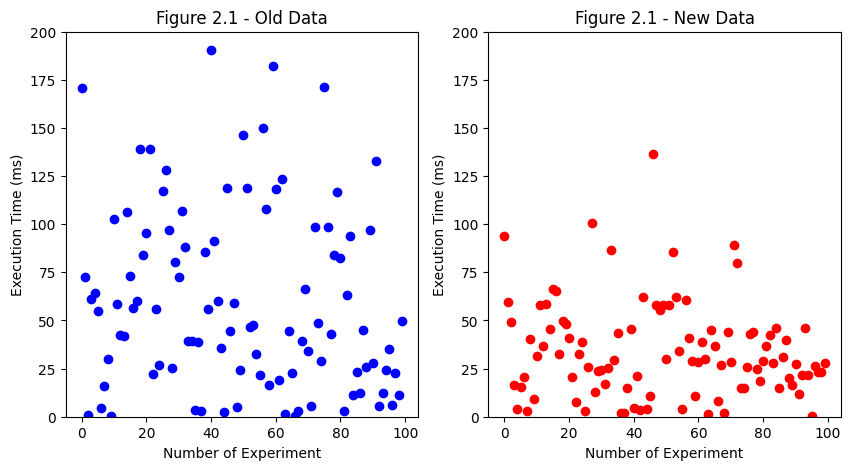

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(x, y1, c = 'blue')
axs[0].set_xlabel('Number of Experiment')
axs[0].set_ylabel('Execution Time (ms)')
axs[0].set_ylim([0, 200])
axs[0].set_title('Figure 2.1 - Old Data')
axs[1].scatter(x, y2, c = 'red')
axs[1].set_xlabel('Number of Experiment')
axs[1].set_ylabel('Execution Time (ms)')
axs[1].set_ylim([0, 200])
axs[1].set_title('Figure 2.1 - New Data')
plt.show()

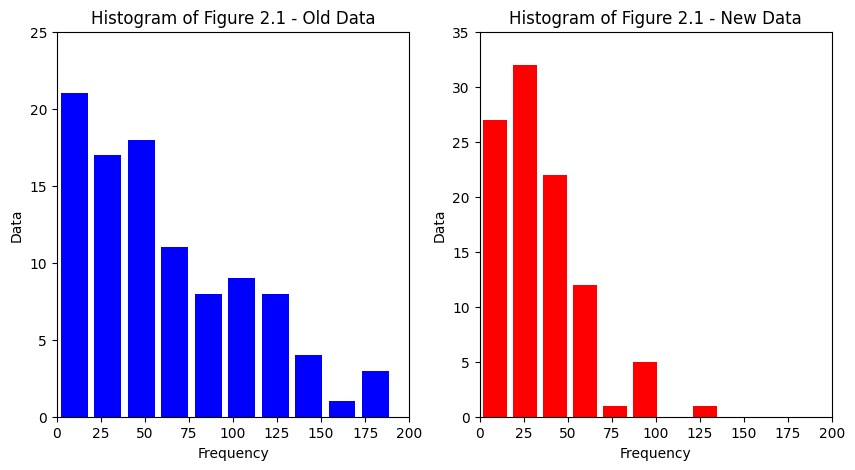

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(fig_2_1_old, bins = 10, rwidth = 0.8, color = 'blue')
axs[0].set_xlim([0, 200])
axs[0].set_ylim([0, 25])
axs[0].set_ylabel('Data')
axs[0].set_xlabel('Frequency')
axs[0].set_title('Histogram of Figure 2.1 - Old Data')
axs[1].hist(fig_2_1_new, bins = 8, rwidth = 0.8, color = 'red')
axs[1].set_xlim([0, 200])
axs[1].set_ylim([0, 35])
axs[1].set_ylabel('Data')
axs[1].set_xlabel('Frequency')
axs[1].set_title('Histogram of Figure 2.1 - New Data')
plt.show()

<span style="font-size: 100%;"> Figure 2.2) ECDF<span>

In [6]:
x1 = np.sort(fig_2_1_old)
y1 = np.arange(1, len(x1) + 1 / len(x1))
y1_norm = (y1 - min(y1)) / (max(y1) - min(y1))
x2 = np.sort(fig_2_1_new)
y2 = np.arange(1, len(x2) + 1 / len(x2))
y2_norm = (y2 - min(y2)) / (max(y2) - min(y2))

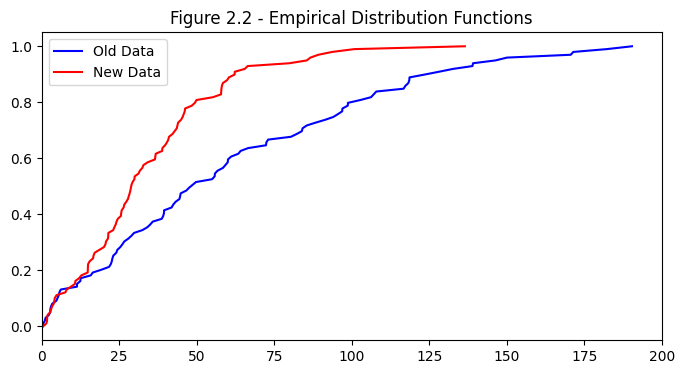

In [7]:
fig, ax = plt.subplots(figsize = (8, 4))
plt.plot(x1, y1_norm, 'b', label = 'Old Data')
plt.plot(x2, y2_norm, 'r', label = 'New Data')
plt.xlim([0, 200])
plt.legend()
plt.title('Figure 2.2 - Empirical Distribution Functions')
plt.show()

<span style="font-size: 100%;"> Figure 2.3) Box Plots<span>

In [8]:
mean_old = np.mean(fig_2_1_old)
q1_old, q3_old = np.percentile(fig_2_1_old, [25, 75])
iqr_old = q3_old - q1_old
l_bound_old = q1_old - 1.5 * iqr_old
u_bound_old = q3_old + 1.5 * iqr_old
outliers_old = fig_2_1_old[(fig_2_1_old < l_bound_old) | (fig_2_1_old > u_bound_old)]

In [9]:
mean_new = np.mean(fig_2_1_new)
q1_new, q3_new = np.percentile(fig_2_1_new, [25, 75])
iqr_new = q3_new - q1_new
l_bound_new = q1_new - 1.5 * iqr_new
u_bound_new = q3_new + 1.5 * iqr_new
outliers_new = fig_2_1_new[(fig_2_1_new < l_bound_new) | (fig_2_1_new > u_bound_new)]

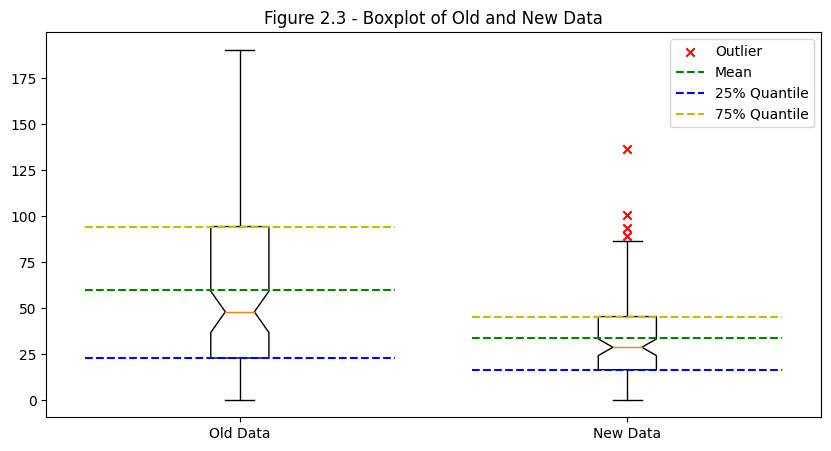

In [10]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.boxplot(fig_2_1_old, positions=[0.5], showfliers = False, notch = True)
ax.scatter(np.ones_like(outliers_old) * 0.5, outliers_old, color = 'r', marker = 'x', label = 'Outlier')
ax.axhline(y = mean_old, color = 'g', linestyle = '--', xmin = 0.05, xmax = 0.45, label = 'Mean')
ax.axhline(y = q1_old, color ='b', linestyle = '--', xmin = 0.05, xmax = 0.45, label = '25% Quantile')
ax.axhline(y = q3_old, color = 'y', linestyle = '--', xmin = 0.05, xmax = 0.45, label = '75% Quantile')

ax.boxplot(fig_2_1_new, positions = [1.5], showfliers = False, notch = True)
ax.scatter(np.ones_like(outliers_new) * 1.5, outliers_new, color = 'r', marker = 'x')
ax.axhline(y = mean_new, color = 'g', linestyle = '--', xmin = 0.55, xmax = 0.95)
ax.axhline(y = q1_new, color = 'b', linestyle = '--', xmin = 0.55, xmax = 0.95)
ax.axhline(y = q3_new, color = 'y', linestyle = '--', xmin = 0.55, xmax = 0.95)

ax.set_xticks([0.5, 1.5])
ax.legend()
ax.set_xticklabels(['Old Data', 'New Data'])
ax.set_title('Figure 2.3 - Boxplot of Old and New Data')
plt.show()


<span style="font-size: 100%;"> Figure 2.7)<span>

In [11]:
# Reduction in run time (in ms)
rir_data = fig_2_1_old - fig_2_1_new
c_i = scipy.stats.t.interval(confidence = 0.95, df = len(rir_data) - 1, loc = np.mean(rir_data), scale=scipy.stats.sem(rir_data))
print("Confidence Interval: " +str(c_i))

Confidence Interval: (15.76343130526523, 36.360198243934775)


In [12]:
mean_rir = np.mean(rir_data)
q1_rir, q3_rir = np.percentile(rir_data, [25, 75])
iqr_rir = q3_rir - q1_rir
l_bound_rir = q1_rir - 1.5 * iqr_rir
u_bound_rir = q3_rir + 1.5 * iqr_rir
outliers_rir = rir_data[(rir_data < l_bound_rir) | (rir_data > u_bound_rir)]
print("Mean: " + str(mean_rir))

Mean: 26.061814774600002


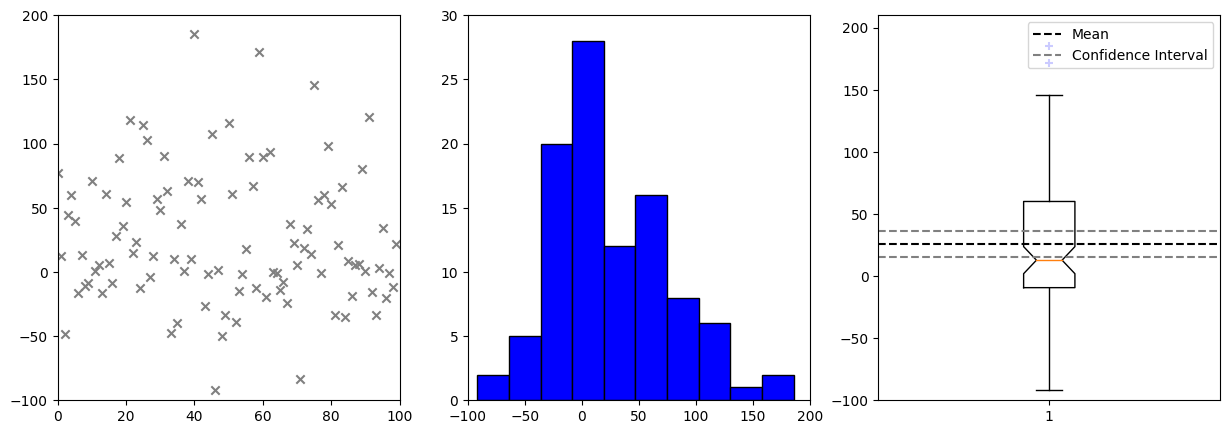

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(x, rir_data, c = 'gray', marker = 'x')
axs[0].set_xlim([0, 100])
axs[0].set_ylim([-100, 200])
axs[1].hist(rir_data, bins = 10, color = 'blue', edgecolor = 'black')
axs[1].set_xlim([-100, 200])
axs[1].set_ylim([0, 30])
axs[2].boxplot(rir_data, showfliers = False, notch = True) 
axs[2].scatter(np.ones_like(outliers_rir), outliers_rir, color = 'b', marker = '+')
axs[2].axhline(y = mean_rir, color = 'black', linestyle = '--', label = 'Mean')
axs[2].axhline(y = c_i[0], color = 'gray', linestyle = '--', label = 'Confidence Interval')
axs[2].axhline(y = c_i[1], color = 'gray', linestyle = '--')
axs[2].set_ylim([-100, 210])
axs[2].legend()
plt.show()

<span style="font-size: 100%;"> Figure 2.10)<span>

In [14]:
fig_2_10 = np.loadtxt("data/figure 2.10/joe.dat")
fig_2_10

array([-101.99712  ,  110.53486  ,   31.730769 ,  -72.230274 ,
        -56.050616 ,  -43.769101 ,  221.47822  , -280.67876  ,
         76.300809 ,  -28.053263 ,   86.635608 , -121.68087  ,
         54.327684 , -167.0995   ,  -75.887464 ,  221.15201  ,
       -110.22271  ,   45.826653 ,  -68.9198   ,  -41.759889 ,
        159.66686  ,  -18.957973 ,   46.821712 , -104.5328   ,
       -100.84782  ,   58.160707 , -154.57197  ,   55.830745 ,
        -34.02587  , -106.29868  ,  339.14064  , -260.86179  ,
        -75.655051 ,   61.854314 ,  -70.252448 ,  117.87248  ,
        -33.304488 , -159.59139  ,   27.00203  ,  180.79342  ,
         16.192319 , -101.58598  ,  -79.752894 ,  204.06331  ,
       -291.4701   ,   -5.6184212,   46.439123 ,  101.0371   ,
       -245.08147  ,  151.90244  ,  -96.59039  ,  -49.341091 ,
        163.63166  , -123.79599  ,  -96.203808 ,  120.42385  ,
         14.82835  ,  -53.420495 , -236.15305  ,   32.08707  ,
         83.651554 ,    5.9711315,  -64.04387  ,  151.9

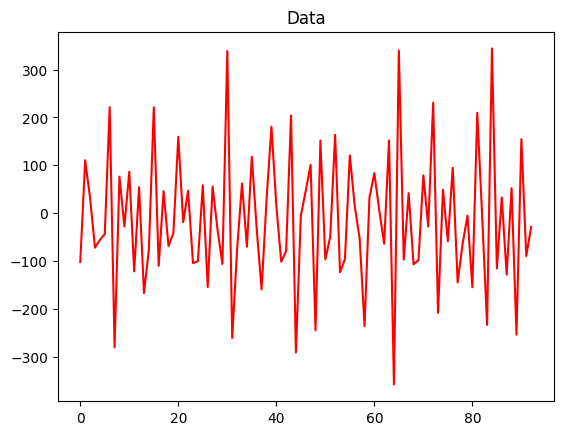

In [15]:
t = np.arange(len(fig_2_10))
plt.plot(t , fig_2_10, c = "red")
plt.title("Data")
plt.show()

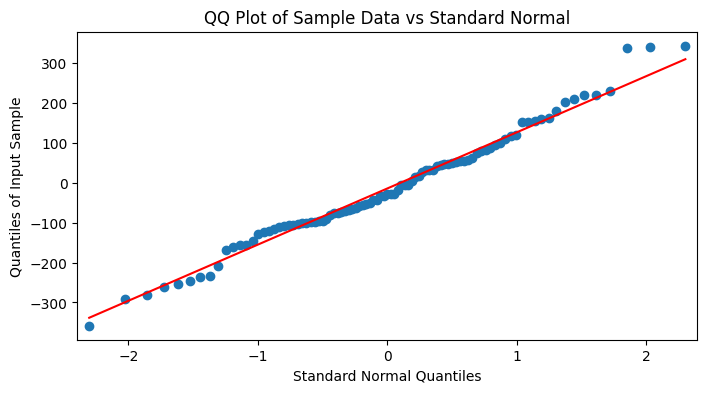

In [16]:
fig, ax = plt.subplots(figsize = (8, 4))
qqplot(fig_2_10, line = 's', ax = ax)
ax.set_title('QQ Plot of Sample Data vs Standard Normal')
ax.set_xlabel('Standard Normal Quantiles')
ax.set_ylabel('Quantiles of Input Sample')
plt.show()

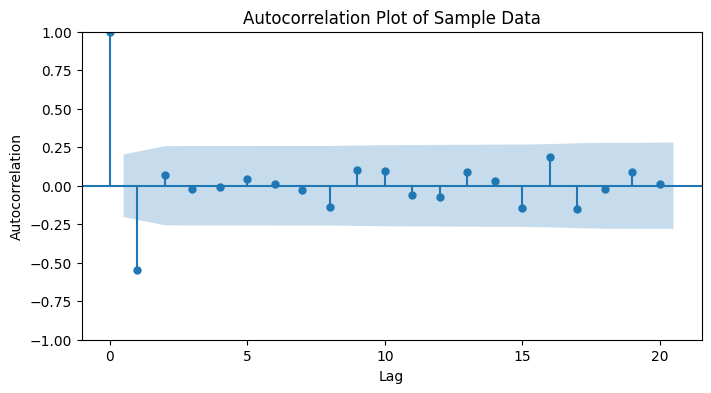

In [17]:
fig, ax = plt.subplots(figsize = (8, 4))
plot_acf(fig_2_10,  ax = ax)
ax.set_title('Autocorrelation Plot of Sample Data')
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
plt.show()

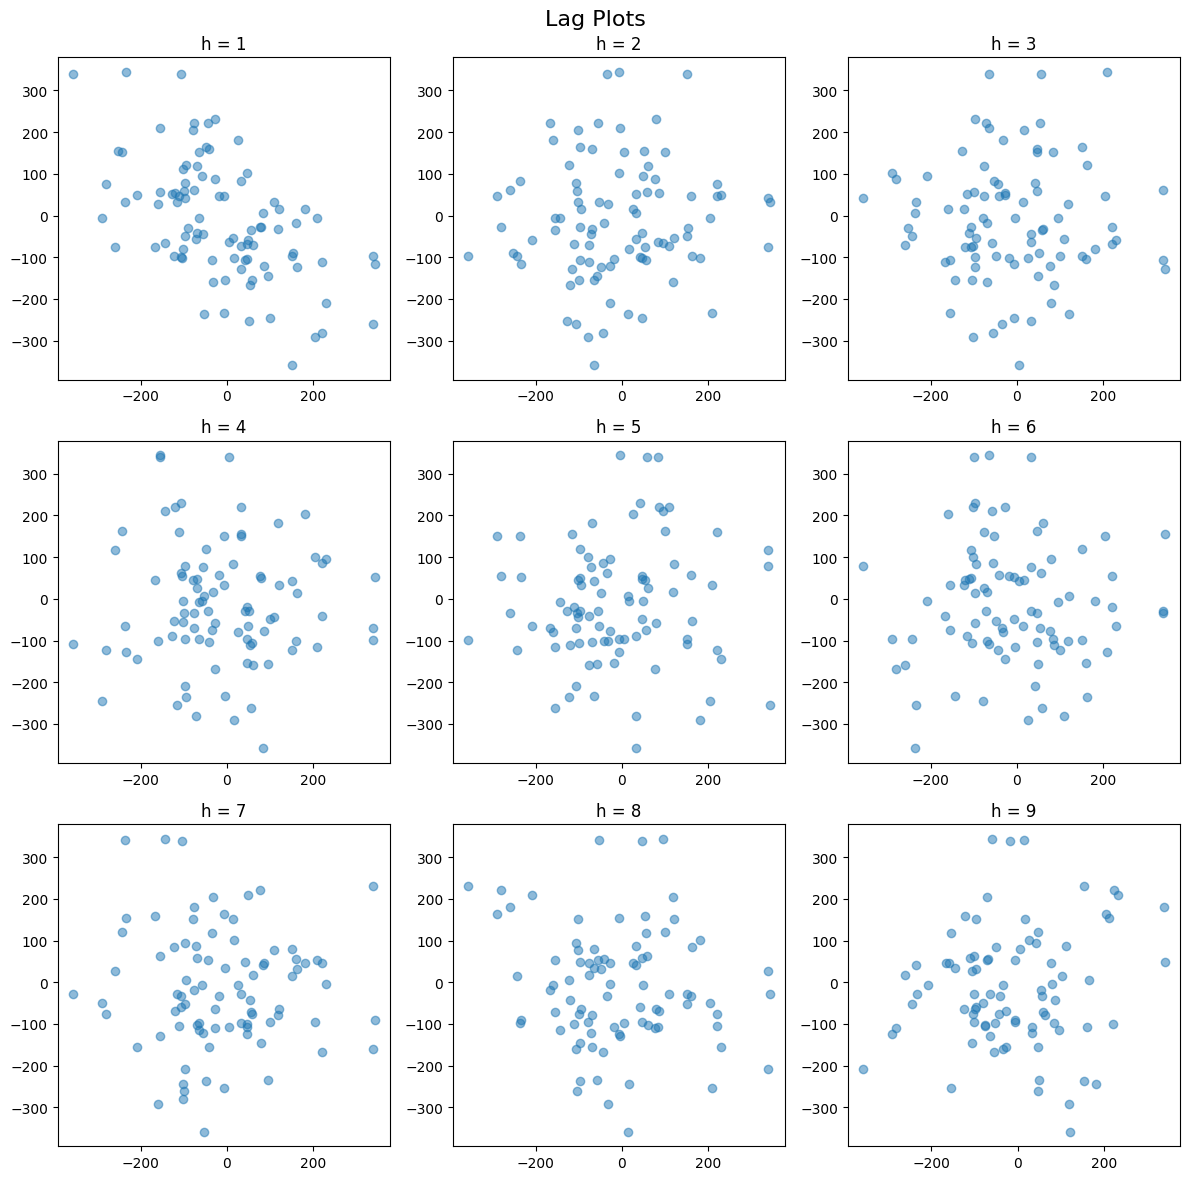

In [18]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (12, 12))

for lag, ax in zip(range(1, 10), axes.flat):
    ax.scatter(fig_2_10[:-lag], fig_2_10[lag:], alpha = 0.5)
    ax.set_title(f'h = {lag}')

fig.suptitle("Lag Plots", fontsize = 16)
plt.tight_layout()
plt.show()